## *Machine learning approach for autism detection in children`s*

### **Project designed and executed by Vandan Gorade.**

**Dataset**: We'll be using the "Autistic Spectrum Disorder Screening Data for Children`s" public dataset from the UCI repository. The datset was donated by Prof. Fadi Thabtah, after being published in the article "Autism Spectrum Disorder Screening: Machine Learning Adaptation and DSM-5 Fulfillment". You can find the article by Fadi Thabtah online. The data we investigate here consists of small changes to the original dataset, such as removing the 'age_desc' feature and records with missing or ill-formatted entries. Very few published articles are available online as the dataset has not been out for long and as a result refernce to a benchmark model is very rare.

**Abstract**:Autistic Spectrum Disorder (ASD) is a neurodevelopment condition associated with significant healthcare costs, and early diagnosis can significantly reduce these. Unfortunately, waiting times for an ASD diagnosis are lengthy and procedures are not cost effective. The economic impact of autism and the increase in the number of ASD cases across the world reveals an urgent need for the development of easily implemented and effective screening methods. Therefore, a time-efficient and accessible ASD screening is imminent to help health professionals and inform individuals whether they should pursue formal clinical diagnosis.

The rapid growth in the number of ASD cases worldwide necessitates datasets related to behaviour traits. However, such datasets are rare making it difficult to perform thorough analyses to improve the efficiency, sensitivity, specificity and predictive accuracy of the ASD screening process. Presently, very limited autism datasets associated with clinical or screening are available and most of them are genetic in nature. Hence, we propose a new dataset related to autism screening of childrens that contained 20 features to be utilised for further analysis especially in determining influential autistic traits and improving the classification of ASD cases. In this dataset, we record ten behavioural features (AQ-10-Adult) plus ten individuals characteristics that have proved to be effective in detecting the ASD cases from controls in behaviour science.

**Sources**:

1) Tabtah, F. (2017). Autism Spectrum Disorder Screening: Machine Learning Adaptation and DSM-5 Fulfillment. Proceedings of the 1st International Conference on Medical and Health Informatics 2017, pp.1-6. Taichung City, Taiwan, ACM.

2) Thabtah, F. (2017). ASDTests. A mobile app for ASD screening. www.asdtests.com [accessed December 20th, 2017].

3) Thabtah, F. (2017). Machine Learning in Autistic Spectrum Disorder Behavioural Research: A Review. To Appear in Informatics for Health and Social Care Journal. December, 2017 (in press)



**Problem statement**: With available ASD data my goal is to make predictions regarding new patients and classify them into one of the two categories: "patient has ASD" or "patient does not have ASD".

**Type of problem**: It is a *binary classification* problem. We will be using *supervised machine learning* to refer to creating and using models that are learned from data i.e there are set of data labeled with correct answer for model to learn.

**Data overview**:

1)Data Type: Multivariate OR Univariate OR Sequential OR Time-Series OR Text OR Domain-Theory
Nominal / categorical, binary and continuous 

2)Task: Classification

3)Attribute Type: Categorical, continuous and binary  

4)Area: Medical, health and social science

5)Format Type: Non-Matrix

6)Does your data set contain missing values? Yes 

7)Number of Instances (records in your data set): 292

8)Number of Attributes (fields within each record): 21


**Models using**: 

* Logistic Regression
* Decision Trees
* Random Forest 
* SVM

It also aims to implements the one of the most effective in terms of correct classification or a combination of classifiers (*Ensemble learing*) like Random Forest to arrive at a decision. 

**Real world objective/constraints**:

1) The cost of misclassification is very high.

2) Interpretability is important.

3) No latency requirement.

**Metrics**:
In order to choose the appropriate model that avoids Underfitting or Overfitting the data we
will analyze the Bias-Variance Trade-Off, Model Complexity Graph, Learning Curves and Receiver Operator Characteristic Curves (ROC). To measure the effectiveness of each classification model we will study the accuracy score along with the precision, recall, F-Beta Score and confusion matrix.


## **Steps/Road Map**
* Step 0: Import Dataset/libraries.

* Step 1: Clean Datasets (The data needs to be cleaned; many rows contain missing data, and there may be erroneous data identifiable as outliers).

* Step 2: A quick visualization.

* Step 3: At First, I applied several Supervised Machine Learning (SML) techniques on the data for classification purpose.

* Step 4: Next, I experimented with different topologies, optimizers, and hyperparameters for different models.

* Step 5: Model tuning.

* Step 6: Feature Selection.

* Step 7: Then I built a Multi-Layer Perceptron and train it to classify indivisual with ASD based on its features.

* Step 8: Conclusion.


## Step 0: Import dataset

In [1]:
#import libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
import time as time
import os
from IPython.display import display # Allows the use of display() for DataFrame

#pretty display for notebooks
%matplotlib inline

data = pd.read_csv("ADS.csv")
display(data.head(7))

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,Gender,Ethnicity,Jaundice_born,Autism,Country,Used_app_before,result,Age_desc,Relation,Class
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5,'4-11 years',Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,'Middle Eastern ',no,no,Jordan,no,5,'4-11 years',Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,?,no,no,Jordan,yes,5,'4-11 years',?,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,?,yes,no,Jordan,no,4,'4-11 years',?,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,'United States',no,10,'4-11 years',Parent,YES
5,0,0,1,0,1,1,0,1,0,1,...,m,?,no,yes,Egypt,no,5,'4-11 years',?,NO
6,1,0,1,1,1,1,0,1,0,1,...,m,White-European,no,no,'United Kingdom',no,7,'4-11 years',Parent,YES


In [2]:
data.shape 
#Number of Instances (records in your data set): 292
#Number of Attributes (fields within each record): 21

(292, 21)

In [3]:
# Number of records where individual's with ASD
n_asd_yes = len(data[data['Class'] == 'YES'])

#Number of records where individual's with no ASD
n_asd_no = len(data[data['Class'] == 'NO'])

# Total number of records
n_records = len(data.index)

#Percentage of individuals whose are with ASD
yes_percent = float(n_asd_yes) / n_records *100

print("Individuals diagonised with ASD: ",n_asd_yes)
print("Individuals not diagonised with ASD: ",n_asd_no)
print("Percentage of individuals diagonised with ASD: ", yes_percent)

Individuals diagonised with ASD:  141
Individuals not diagonised with ASD:  151
Percentage of individuals diagonised with ASD:  48.28767123287671


## Data preparation
Before data can be used as input for machine learning algorithms, it must be cleaned, formatted, and maybe even restructured — this is typically known as preprocessing. Unfortunately, for this dataset, there are many invalid or missing entries(?) we must deal with, moreover, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

I use the optional parmaters in read_csv to convert missing data (indicated by a ?) into NaN, and to add the appropriate column names ():

In [4]:
asd_data = pd.read_csv('ADS.csv', na_values=['?'])
asd_data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,Gender,Ethnicity,Jaundice_born,Autism,Country,Used_app_before,result,Age_desc,Relation,Class
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5,'4-11 years',Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,'Middle Eastern ',no,no,Jordan,no,5,'4-11 years',Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,NaN,no,no,Jordan,yes,5,'4-11 years',NaN,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,NaN,yes,no,Jordan,no,4,'4-11 years',NaN,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,'United States',no,10,'4-11 years',Parent,YES


In [5]:
asd_data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,result
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,288.000000,292.000000
mean,0.633562,0.534247,0.743151,0.551370,0.743151,0.712329,0.606164,0.496575,0.493151,0.726027,6.354167,6.239726
std,0.482658,0.499682,0.437646,0.498208,0.437646,0.453454,0.489438,0.500847,0.500811,0.446761,2.365456,2.284882
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,10.000000


In [6]:
data.info()
#we have 10 categorical features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 21 columns):
A1_Score           292 non-null int64
A2_Score           292 non-null int64
A3_Score           292 non-null int64
A4_Score           292 non-null int64
A5_Score           292 non-null int64
A6_Score           292 non-null int64
A7_Score           292 non-null int64
A8_Score           292 non-null int64
A9_Score           292 non-null int64
A10_Score          292 non-null int64
Age                292 non-null object
Gender             292 non-null object
Ethnicity          292 non-null object
Jaundice_born      292 non-null object
Autism             292 non-null object
Country            292 non-null object
Used_app_before    292 non-null object
result             292 non-null int64
Age_desc           292 non-null object
Relation           292 non-null object
Class              292 non-null object
dtypes: int64(11), object(10)
memory usage: 48.0+ KB


In [7]:
asd_data.info()
# Now we can see that missing values are randomly spread over the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 21 columns):
A1_Score           292 non-null int64
A2_Score           292 non-null int64
A3_Score           292 non-null int64
A4_Score           292 non-null int64
A5_Score           292 non-null int64
A6_Score           292 non-null int64
A7_Score           292 non-null int64
A8_Score           292 non-null int64
A9_Score           292 non-null int64
A10_Score          292 non-null int64
Age                288 non-null float64
Gender             292 non-null object
Ethnicity          249 non-null object
Jaundice_born      292 non-null object
Autism             292 non-null object
Country            292 non-null object
Used_app_before    292 non-null object
result             292 non-null int64
Age_desc           292 non-null object
Relation           249 non-null object
Class              292 non-null object
dtypes: float64(1), int64(11), object(9)
memory usage: 48.0+ KB


In [8]:
data['Gender'].value_counts()

asd_data['Gender'].value_counts()

m    208
f     84
Name: Gender, dtype: int64

In [9]:
data["Country"].value_counts()

asd_data["Country"].value_counts()

'United Kingdom'           49
'United States'            42
India                      42
Australia                  23
Jordan                     20
'New Zealand'              13
Egypt                       9
'United Arab Emirates'      7
Canada                      7
Bangladesh                  6
Pakistan                    4
Philippines                 4
'Saudi Arabia'              4
Armenia                     3
Iraq                        3
Russia                      3
Syria                       3
Libya                       3
Qatar                       3
'South Africa'              2
Turkey                      2
Mexico                      2
Lebanon                     2
Austria                     2
Italy                       2
Bahrain                     2
Malaysia                    2
Georgia                     2
Afghanistan                 2
Brazil                      2
Ireland                     1
Argentina                   1
Germany                     1
'Isle of M

In [10]:
data["Relation"].value_counts()

asd_data["Relation"].value_counts()

Parent                        214
Relative                       17
'Health care professional'     13
Self                            4
self                            1
Name: Relation, dtype: int64

In [11]:
data['Class'].value_counts()

asd_data["Class"].value_counts()

NO     151
YES    141
Name: Class, dtype: int64

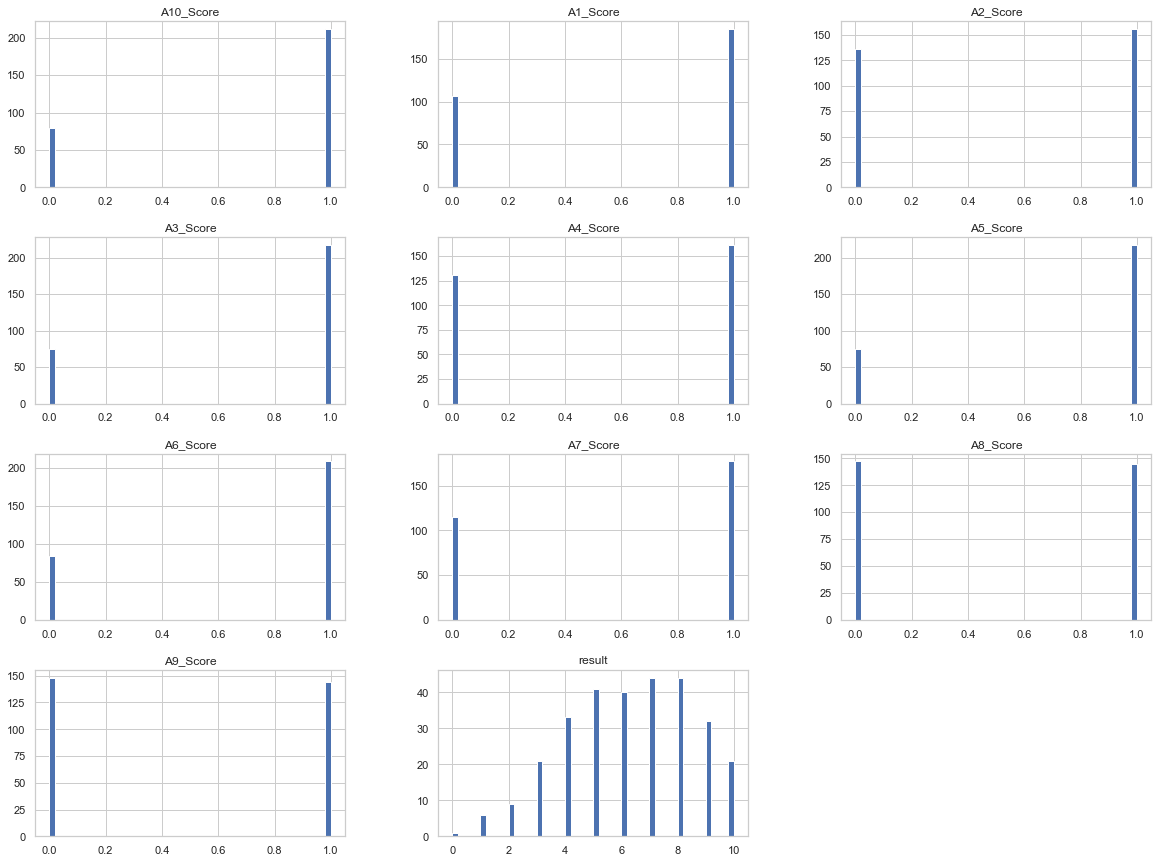

In [12]:
data.hist(bins=50, figsize=(20,15))
plt.show()

## Step 1: Cleaning data

In [13]:
#since the missing data seems randomly distributed, I go ahead and drop rows with missing data.
#If we could have fill with median values for 'NaN' instead of dropping them, but in this situation that is little complicated as I have lot of categorical colums with 'NaN'.

asd_data.loc[(asd_data['Age'].isnull()) |(asd_data['Gender'].isnull()) |(asd_data['Ethnicity'].isnull()) 
            |(asd_data['Jaundice_born'].isnull())|(asd_data['Autism'].isnull()) |(asd_data['Country'].isnull())
            |(asd_data['Used_app_before'].isnull())|(asd_data['result'].isnull())|(asd_data['Age_desc'].isnull())
            |(asd_data['Relation'].isnull())]


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,Gender,Ethnicity,Jaundice_born,Autism,Country,Used_app_before,result,Age_desc,Relation,Class
2,1,1,0,0,0,1,1,1,0,0,...,m,NaN,no,no,Jordan,yes,5,'4-11 years',NaN,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,NaN,yes,no,Jordan,no,4,'4-11 years',NaN,NO
5,0,0,1,0,1,1,0,1,0,1,...,m,NaN,no,yes,Egypt,no,5,'4-11 years',NaN,NO
9,0,0,1,1,1,0,1,1,0,0,...,f,NaN,no,yes,Austria,no,5,'4-11 years',NaN,NO
11,0,1,0,0,1,0,0,0,0,1,...,f,NaN,no,no,Kuwait,no,3,'4-11 years',NaN,NO
19,1,1,1,1,1,1,0,1,0,1,...,m,NaN,no,no,Egypt,no,8,'4-11 years',NaN,YES
21,0,0,1,1,0,1,0,1,1,0,...,f,NaN,no,no,Egypt,no,5,'4-11 years',NaN,NO
24,1,0,1,1,1,1,0,1,1,1,...,m,NaN,no,no,Egypt,no,8,'4-11 years',NaN,YES
28,0,1,1,0,0,0,1,1,0,1,...,m,NaN,no,yes,'United Arab Emirates',no,5,'4-11 years',NaN,NO
32,1,0,0,1,0,1,1,1,1,1,...,m,NaN,no,no,Egypt,no,7,'4-11 years',NaN,YES


## Step 2: Data visualization


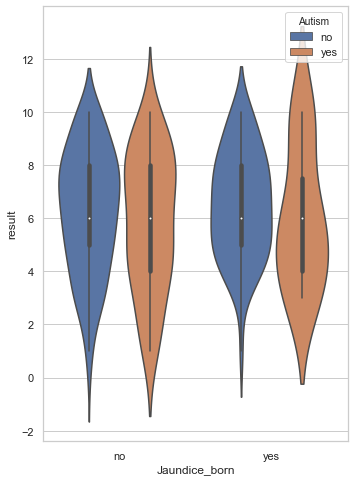

In [14]:
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.violinplot(x = 'Jaundice_born', y = 'result',hue="Autism", data = asd_data[0:])

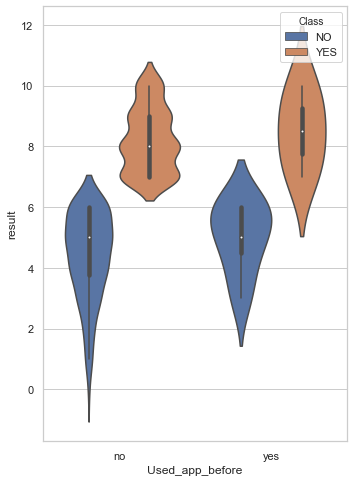

In [15]:
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.violinplot(x = 'Used_app_before', y = 'result',hue="Class", data = asd_data[0:])

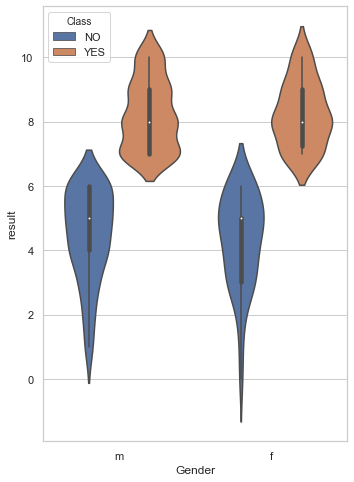

In [16]:
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.violinplot(x = 'Gender', y = 'result',hue="Class", data = asd_data[0:])

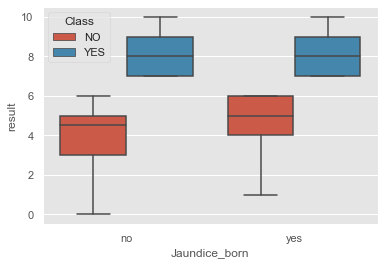

In [17]:
plt.style.use("ggplot")
sns.boxplot(x = 'Jaundice_born',y = "result", hue="Class", data= asd_data)

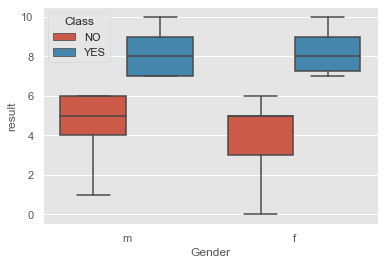

In [18]:
plt.style.use("ggplot")
sns.boxplot(x = 'Gender',y = "result", hue="Class", data= asd_data)

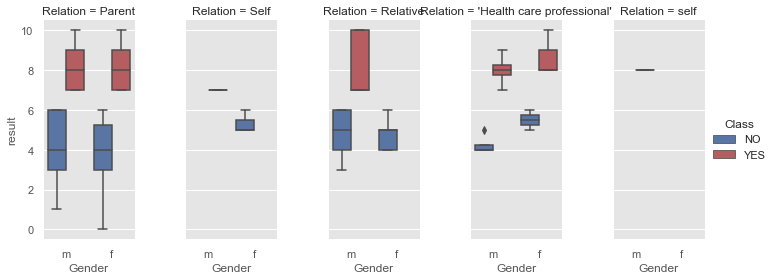

In [19]:
sns.catplot(x="Gender", y="result", hue="Class",
               col="Relation", data=asd_data, kind ="box", height=4, aspect=.5, palette={'YES': "r", 'NO': "b"});

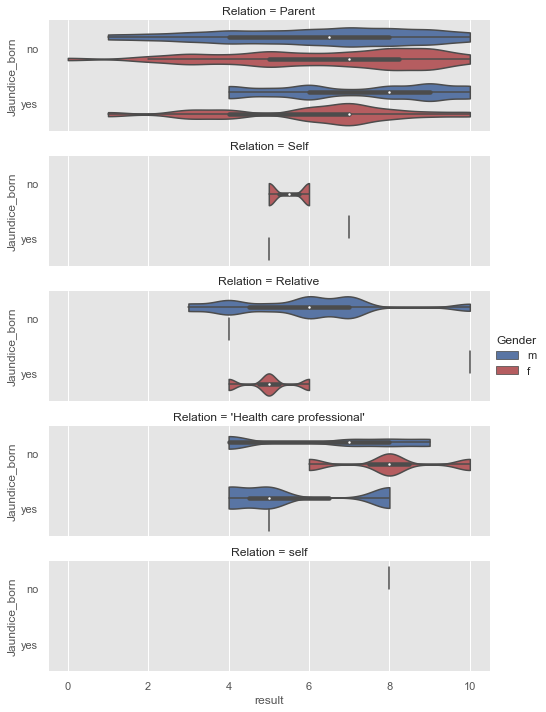

In [20]:
g = sns.catplot(x="result", y="Jaundice_born",
                   hue="Gender", row="Relation",
                   data=asd_data,
                    orient="h", height=2, aspect=3.5, palette={'f': "r", 'm': "b"},
                  kind="violin", dodge=True, cut=0, bw=.2)

In the two figures above, I have used two different depiction techniques to have a quick peek on the ASD dataset we are dealing with. Both of the occasions I have used catplot module from seaborn visualization software. In the first case, I used 'swamp' kind of graph expressing the relationship between several different features present in the data whereas in the second case, 'box' method was used to present the visual way of showing how different features were associated with each other.

Next I'll need to convert the Pandas dataframes into numpy arrays that can be used by scikit_learn. Let's create an array that extracts only the feature data we want to work with and another array that contains the classes (class).

In [21]:
asd_raw = asd_data['Class']
features_raw = asd_data[['Age', 'Gender', 'Ethnicity', 'Jaundice_born', 'Autism', 'Country', 'result',
                      'Used_app_before','Relation','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score',
                      'A9_Score','A10_Score']]

### Normalizing data using MinMaxScalar()

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['Age', 'result']

features_minmax_transform = pd.DataFrame(data = features_raw)
features_minmax_transform[numerical] = scaler.fit_transform(features_raw[numerical])
features_minmax_transform

display(features_minmax_transform.head(n = 5))


,Age,Gender,Ethnicity,Jaundice_born,Autism,Country,result,Used_app_before,Relation,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,0.285714,m,Others,no,no,Jordan,0.5,no,Parent,1,1,0,0,1,1,0,1,0,0
1,0.285714,m,'Middle Eastern ',no,no,Jordan,0.5,no,Parent,1,1,0,0,1,1,0,1,0,0
2,0.285714,m,NaN,no,no,Jordan,0.5,yes,NaN,1,1,0,0,0,1,1,1,0,0
3,0.142857,f,NaN,yes,no,Jordan,0.4,no,NaN,0,1,0,0,1,1,0,0,0,1
4,0.142857,m,Others,yes,no,'United States',1.0,no,Parent,1,1,1,1,1,1,1,1,1,1


In [23]:
#One-hot encode the 'features_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_minmax_transform)
display(features_final.head(5))


# Encode the 'all_classes_raw' data to numerical values
asd_classes = asd_raw.apply(lambda x: 1 if x == 'YES' else 0)



# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding. ".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)


,Age,result,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,...,Country_Sweden,Country_Syria,Country_Turkey,Used_app_before_no,Used_app_before_yes,Relation_'Health care professional',Relation_Parent,Relation_Relative,Relation_Self,Relation_self
0,0.285714,0.5,1,1,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0.285714,0.5,1,1,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,0.285714,0.5,1,1,0,0,0,1,1,1,...,0,0,0,0,1,0,0,0,0,0
3,0.142857,0.4,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.142857,1.0,1,1,1,1,1,1,1,1,...,0,0,0,1,0,0,1,0,0,0


87 total features after one-hot encoding. 
['Age', 'result', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Gender_f', 'Gender_m', "Ethnicity_'Middle Eastern '", "Ethnicity_'South Asian'", 'Ethnicity_Asian', 'Ethnicity_Black', 'Ethnicity_Hispanic', 'Ethnicity_Latino', 'Ethnicity_Others', 'Ethnicity_Pasifika', 'Ethnicity_Turkish', 'Ethnicity_White-European', 'Jaundice_born_no', 'Jaundice_born_yes', 'Autism_no', 'Autism_yes', "Country_'Costa Rica'", "Country_'Isle of Man'", "Country_'New Zealand'", "Country_'Saudi Arabia'", "Country_'South Africa'", "Country_'South Korea'", "Country_'U.S. Outlying Islands'", "Country_'United Arab Emirates'", "Country_'United Kingdom'", "Country_'United States'", 'Country_Afghanistan', 'Country_Argentina', 'Country_Armenia', 'Country_Australia', 'Country_Austria', 'Country_Bahrain', 'Country_Bangladesh', 'Country_Bhutan', 'Country_Brazil', 'Country_Bulgaria', 'Country_Canada', 'Cou

Text(0, 0.5, 'Frequency')

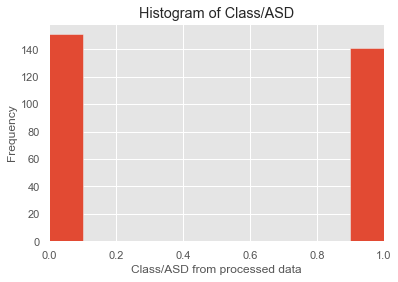

In [24]:
plt.hist(asd_classes, bins=10)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of Class/ASD')
plt.xlabel('Class/ASD from processed data')
plt.ylabel('Frequency')


In [25]:
from sklearn.model_selection import train_test_split

np.random.seed(1234)

X_train, X_test, y_train, y_test = train_test_split(features_final, asd_classes, train_size=0.80, random_state=1)


# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
#asd_data

Training set has 233 samples.
Testing set has 59 samples.


In [54]:
y_test[y_test==np.inf]=np.nan
y_test.fillna(y_test.mean(), inplace=True)

In [55]:
X_train[X_train==np.inf]=np.nan
X_train.fillna(X_train.mean(), inplace=True)

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Step 3: Modelling

## 1) Decision Trees

In [91]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier(random_state=1)

# Train the classifier on the training set
dectree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

## *Evaluating Model* 

In [60]:
y_pred_class = dectree.predict(X_test)

In [61]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('False:', y_pred_class[0:25])

True: [0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1]
False: [0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1]


In [62]:
from sklearn import metrics
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
#print(metrics.confusion_matrix(y_test, y_pred_class))

# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[28  0]
 [ 0 31]]


## *Metrics*

### 1) Classification Accuracy

In [63]:
print((TP + TN) / float(TP + TN + FP + FN))

1.0


### 2) Sensitivity

In [64]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

1.0
1.0


### 3) Specificity

In [65]:
specificity = TN / (TN + FP)

print(specificity)

1.0


### FPR

In [66]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
#print(1 - specificity)

0.0


### 5) precision

In [67]:
precision = TP / float(TP + FP)

#print(precision)
print(metrics.precision_score(y_test, y_pred_class))


1.0


In [69]:
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
dectree.predict(X_test)[0:10]


array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [70]:
dectree.predict_proba(X_test)[0:10]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [71]:
# store the predicted probabilities for class 1
y_pred_prob = dectree.predict_proba(X_test)[:, 1]

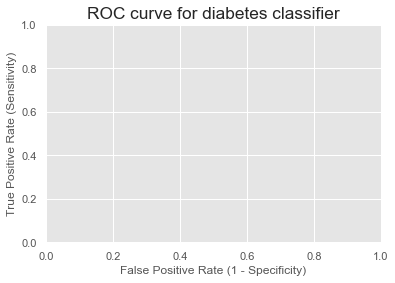

In [72]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [92]:
dectree.score(X_test, y_test)

1.0

In [103]:
asd_classes.replace([np.inf, -np.inf], np.nan, inplace=True)
features_final.replace([np.inf, -np.inf], np.nan, inplace=True)
asd_classes.fillna(asd_classes.mean(), inplace=True)
features_final.fillna(asd_classes.mean(), inplace=True)

### *Cross Validation*

In [104]:
from sklearn.model_selection import cross_val_score

dectree = DecisionTreeClassifier(random_state=2)

cv_scores = cross_val_score(dectree, features_final, asd_classes, cv=10)

cv_scores.mean()

1.0

In [106]:
## AUC SCORE : its a percentage of ROC plot
from sklearn.model_selection import cross_val_score
cross_val_score(dectree, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

1.0

### 2) Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier

ranfor = RandomForestClassifier(n_estimators=5, random_state=1)
ranfor.fit(X_train,y_train)
cv_scores = cross_val_score(ranfor, features_final, asd_classes, cv=10)
cv_scores.mean()

0.9725287356321838

In [109]:

# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(ranfor, features_final, asd_classes, cv=10, scoring='roc_auc').mean()


0.994107142857143

In [115]:
from sklearn.metrics import fbeta_score
predictions_test = ranfor.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.9677419354838711

### 3) Logistic Regression

In [120]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
cv_scores = cross_val_score(logreg, features_final, asd_classes, cv=10)
cv_scores.mean()

0.9827586206896551

In [118]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cv_scores_roc = cross_val_score(logreg, features_final, asd_classes, cv=10, scoring='roc_auc').mean()
cv_scores_roc.mean()

0.9990476190476191

In [121]:
from sklearn.metrics import fbeta_score
predictions_test = logreg.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.9677419354838711

### 4) SVM 

In [122]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='linear', C=C, gamma=2)

In [124]:

cv_scores = cross_val_score(svc, features_final, asd_classes, cv=10)

cv_scores.mean()

0.9965517241379309

In [126]:
from sklearn.model_selection import cross_val_score
cross_val_score(svc, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

1.0

In [127]:
#f1-beta score
svc.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = svc.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

1.0

In [135]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import make_scorer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


def f_beta_score(y_true, y_predict):
    return fbeta_score(y_true, y_predict, beta = 0.5)


#Initialize the classifier
clf = SVC(random_state = 1)

#Create the parameters list you wish to tune, using a dictionary if needed.

parameters = {'C':range(1,6),'kernel':['linear','poly','rbf','sigmoid'],'degree':range(1,6)}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(f_beta_score)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator = clf, param_grid = parameters, scoring = scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.9322
F-score on testing data: 0.9712

Optimized Model
------
Final accuracy score on the testing data: 0.9661
Final F-score on the testing data: 0.9864


In this GridSearchCV methos, we came up with the best result when the kernel was selected as linear.

# Conclusion
After exploring my ASD dataset with different kind of learning algorithms, I have arrived into this conclusion that all of my model work extremely well with the data. I have used three different metric (such as accuracy, AUC score and F-score) to measure the performance of my models, and it seems like all of the metric indicated an almost perfect classification of the ASD cases. Here I think the reason of this high performances with different models is the fact that only one of the feature is predominant over all others which I confirmed with the Feature Importance section in this notebook.

I think to build a more accurate model, we need to have access to more larger datasets. Here the number of instances after cleaning the data were not so sufficient enough so that I can claim that this model is optimum